# Paradigma imperativa

In [30]:
import pandas as pd

dados = pd.read_csv("./data/feedbacks.csv", delimiter=";")

detratores = 0
promotores = 0

notas = dados["Nota"]

for nota in notas:
    if nota >= 9:
        promotores += 1
        continue

    if nota <= 6:
        detratores += 1

nps = (promotores - detratores) / len(notas) * 100
nps

46.93877551020408

In [ ]:
# Paradgima funcional

In [31]:
import pandas as pd


def calcular_nps(notas):
    detratores = notas.apply(lambda nota: nota <= 6).sum()

    # Indexação booleana
    promotores = notas[notas >= 9].count()

    return (promotores - detratores) / len(notas) * 100


dados = pd.read_csv("./data/feedbacks.csv", delimiter=";")

notas = dados["Nota"]
nps = calcular_nps(notas)
nps

46.93877551020408

In [61]:
# Paradigma orientado a objetos

import pandas as pd


class Feedback:

    def __init__(self, nota, comentario) -> None:
        self.nota = nota
        self.comentario = comentario


class AnalisadorFeedback:

    def __init__(self, feedbacks) -> None:
        self.feedbacks = feedbacks

    def calcular_nps(self):
        detratores = len([feedback for feedback in self.feedbacks if feedback.nota <= 6])
        promotores = len([feedback for feedback in self.feedbacks if feedback.nota >= 9])

        return (promotores - detratores) / len(self.feedbacks) * 100


dados = pd.read_csv("./data/feedbacks.csv", delimiter=";")

feedbacks = dados.apply(lambda linha: Feedback(linha["Nota"], linha["Comentário"]), axis=1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()
nps

56.30252100840336

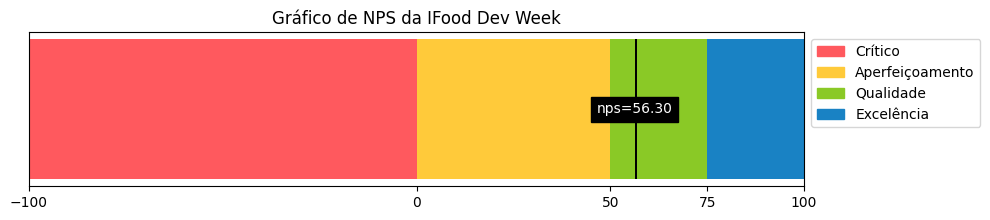

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES = ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']


def criar_grafico_nps(nps):
    fig, ax = plt.subplots(figsize=(10, 2))

    for i, zona in enumerate(NPS_ZONAS):
        ax.barh([0], width=NPS_VALORES[i + 1] - NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

    ax.barh([0], width=.5, left=nps, color="black")
    # Remover as divisões de valores do eixo Y
    ax.set_yticks([])
    # Definir o intervalo de valores do gráfico entre -100 e 100
    ax.set_xlim(-100, 100)
    # Definir no eixo X apenas as divisões de valores especificados dentro de 'NPS_VALORES'
    ax.set_xticks(NPS_VALORES)

    plt.text(nps, 0, f"{nps=:.2f}", ha = "center", va="center", color='white', bbox=dict(facecolor='black'))

    # Criar o card de legendas
    patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
    plt.legend(handles=patches, bbox_to_anchor=(1, 1))

    plt.title("Gráfico de NPS da IFood Dev Week")

    plt.show()


criar_grafico_nps(nps)

In [ ]:
import openai

openai.api_key = "OpenAI API Key"

def analisar_sentimentos(feedbacks):
  comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

  prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário:
            {comentarios_formatados}
            """

  respostaAPI = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
      {
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },
      {
          "role": "user",
          "content": prompt
      }
    ]
  )
  return respostaAPI.choices[0].message.content

insigths = analisar_sentimentos(feedbacks)
print(insigths)